<a href="https://colab.research.google.com/github/Teja3993/Machine_Learning_Lab_Exercises/blob/main/2025124988_ML_Lab_Regression_Metrics_31_Oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Linear Regression ---
MSE: 631.315, R²: 0.986

--- Polynomial Regression (deg=3) ---
MSE: 27312.125, R²: 0.375

--- SVR (RBF Kernel) ---
MSE: 9134.315, R²: 0.791


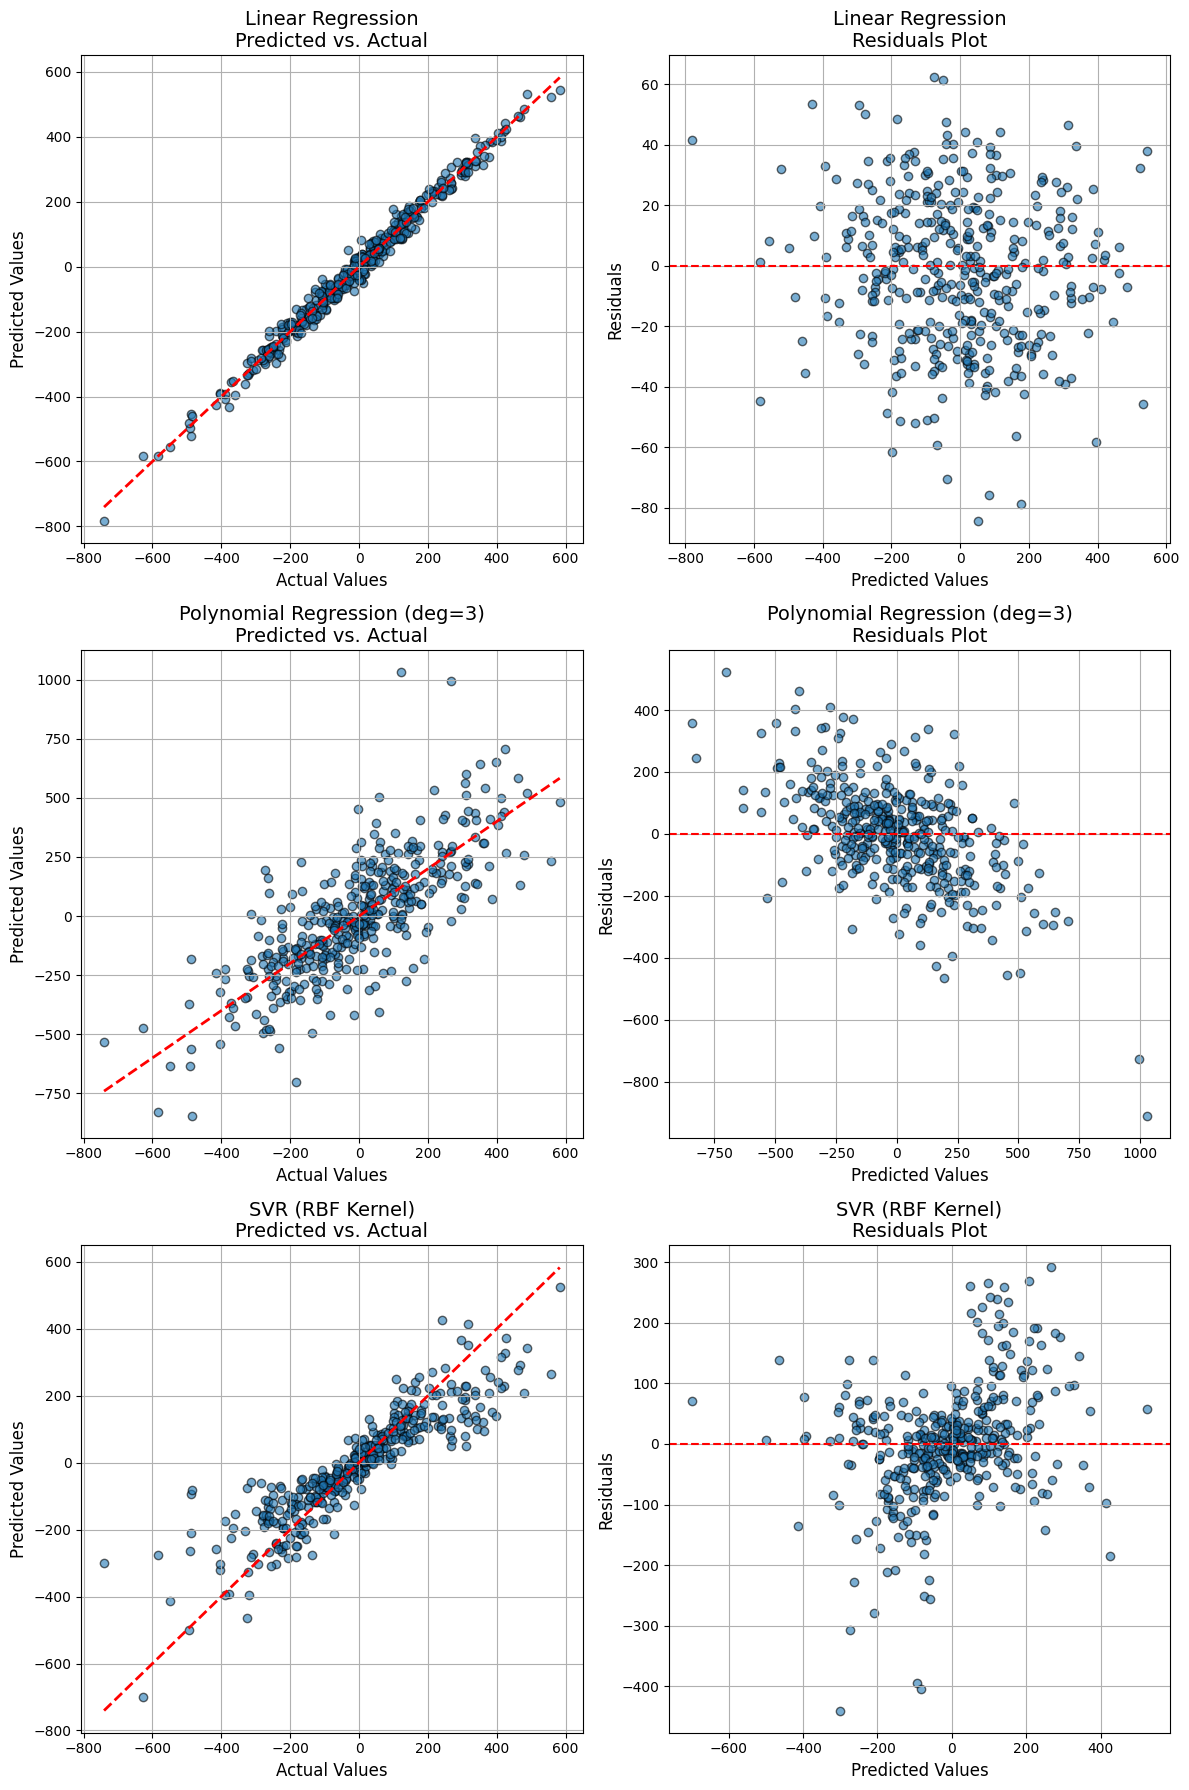

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- 1. Dataset Generation ---
X, y = make_regression(
    n_samples=2000, n_features=20, n_informative=15, noise=25, random_state=42
)

# --- 2. Data Splitting ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# --- 3. Model Definitions ---
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (deg=3)": make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    "SVR (RBF Kernel)": make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
}

# --- 4. Create a Single Figure for All Plots ---
# We make one big figure. figsize is (width, height). Increased height for 3 rows.
plt.figure(figsize=(12, 18))

# --- 5. Model Training, Evaluation, and Plotting ---
# We use enumerate to get an index `i` for placing the plots
for i, (name, model) in enumerate(models.items()):
    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and print metrics (same as before)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n--- {name} ---")
    print(f"MSE: {mse:.3f}, R²: {r2:.3f}")

    # --- Plotting on the grid ---

    # Plot 1: Predicted vs. Actual Values
    # subplot(number_of_rows, number_of_cols, plot_index)
    # The index for the left column plot is 2*i + 1
    plt.subplot(3, 2, 2 * i + 1)
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    perfect_line = np.linspace(min(y_test), max(y_test), 100)
    plt.plot(perfect_line, perfect_line, color='red', linestyle='--', linewidth=2)
    plt.title(f"{name}\nPredicted vs. Actual", fontsize=14)
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.grid(True)

    # Plot 2: Residuals Plot
    # The index for the right column plot is 2*i + 2
    residuals = y_test - y_pred
    plt.subplot(3, 2, 2 * i + 2)
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"{name}\nResiduals Plot", fontsize=14)
    plt.xlabel("Predicted Values", fontsize=12)
    plt.ylabel("Residuals", fontsize=12)
    plt.grid(True)

# --- 6. Display the Final Figure ---
# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()
plt.show()

--- Starting Polynomial Regression Degree Experiment ---

Training Polynomial Regression (deg=2)...
--- Results for Polynomial Regression (deg=2) ---
MSE: 734.465
R²: 0.983

Training Polynomial Regression (deg=5)...
--- Results for Polynomial Regression (deg=5) ---
MSE: 54,780.679
R²: -0.253


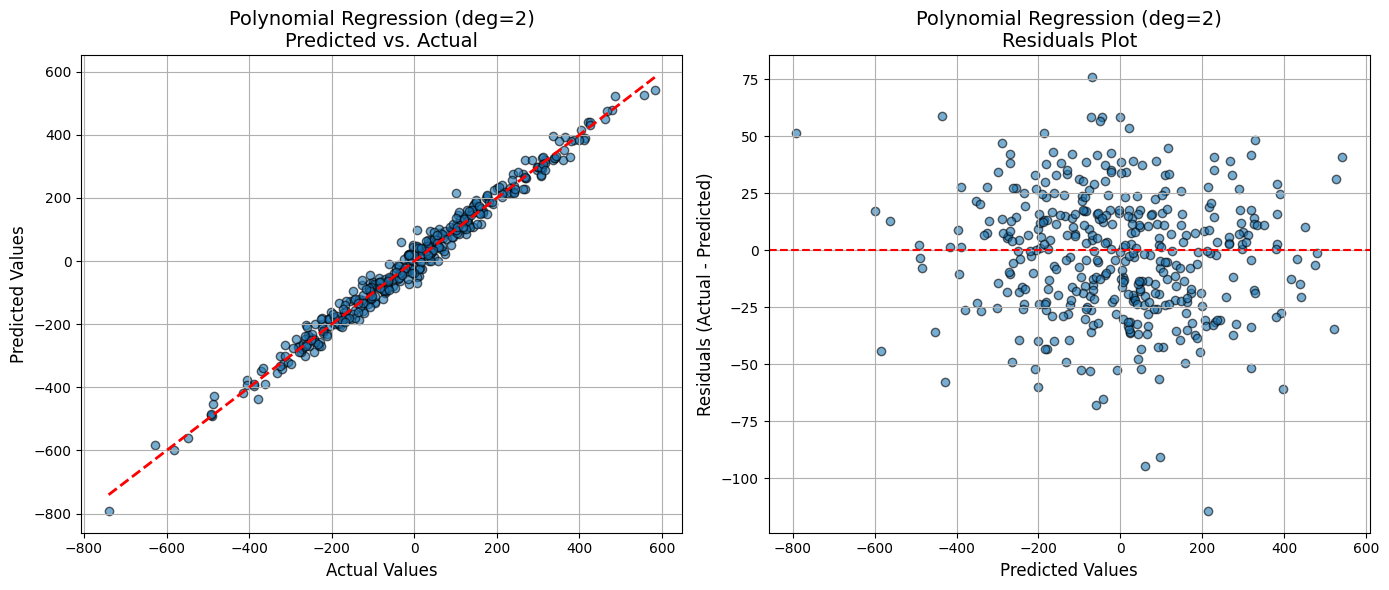

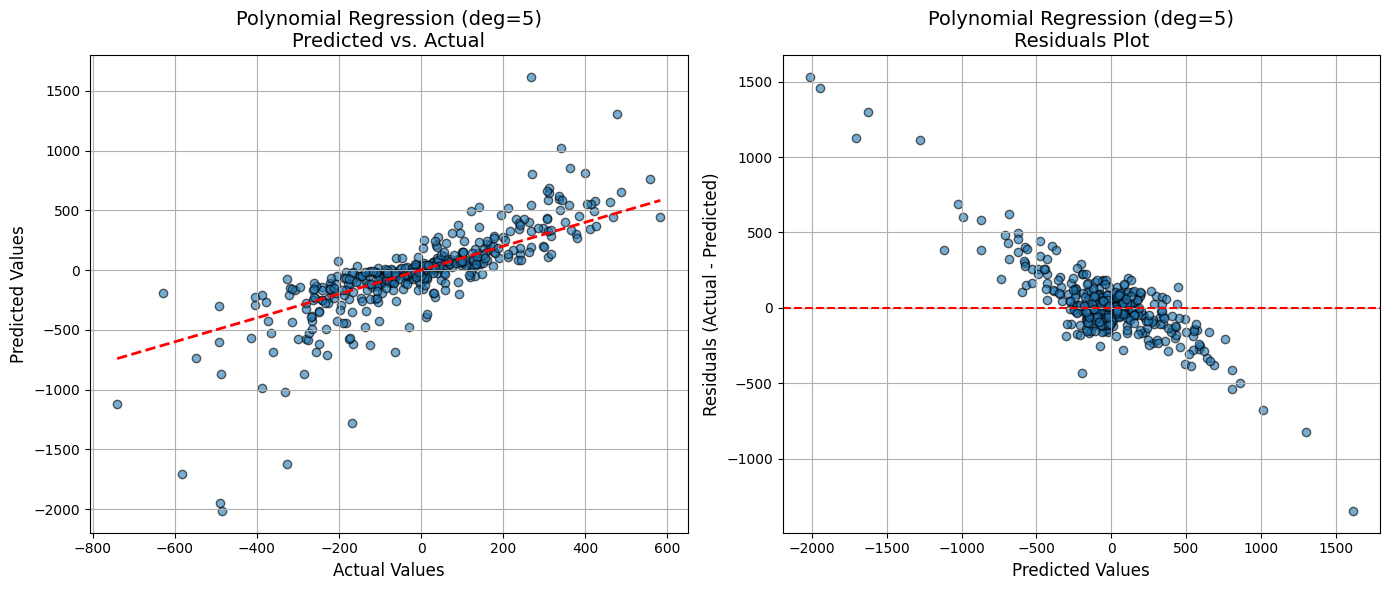

In [2]:
# Task 1 subtask degree=2 and 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Dataset Generation ---
# Same dataset as before so I can compare results properly.
X, y = make_regression(
    n_samples=2000, n_features=20, n_informative=15, noise=25, random_state=42
)

# --- 2. Data Splitting ---
# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# --- 3. Experiment with Polynomial Degrees ---
# The task is to check different degrees and comment on overfitting.
# I'll test degree 2 and degree 5 to see the difference.
degrees_to_test = [2, 5]

print("--- Starting Polynomial Regression Degree Experiment ---")

# Looping through the degrees to avoid running the cell multiple times.
for deg in degrees_to_test:

    # Set up the model name for printing and plotting
    model_name = f"Polynomial Regression (deg={deg})"

    # Create the model pipeline for the current degree
    # This is where the degree is actually set.
    model = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression())

    # Train the model on the training data
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions on the unseen test data
    y_pred = model.predict(X_test)

    # Calculate the performance metrics to see how well it did
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results for this degree
    print(f"--- Results for {model_name} ---")
    print(f"MSE: {mse:,.3f}") # Added comma for better readability of large numbers
    print(f"R²: {r2:.3f}")

    # --- Plotting the results for this degree ---
    # Visualizing helps to really understand the performance.
    plt.figure(figsize=(14, 6))

    # Plot 1: Predicted vs. Actual
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    perfect_line = np.linspace(min(y_test), max(y_test), 100)
    plt.plot(perfect_line, perfect_line, color='red', linestyle='--', linewidth=2)
    plt.title(f"{model_name}\nPredicted vs. Actual", fontsize=14)
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.grid(True)

    # Plot 2: Residuals Plot
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"{model_name}\nResiduals Plot", fontsize=14)
    plt.xlabel("Predicted Values", fontsize=12)
    plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)
    plt.grid(True)

    plt.tight_layout()

# Finally, show all the generated plots after the loop finishes.
plt.show()

--- Starting SVR Hyperparameter Experiment ---

--- Original (C=100, γ=0.1) ---
Parameters: C=100, gamma=0.1, epsilon=0.1
MSE: 9,134.315
R²: 0.791

--- Lower C (C=1) ---
Parameters: C=1, gamma=0.1, epsilon=0.1
MSE: 41,073.966
R²: 0.060

--- Higher C (C=1000) ---
Parameters: C=1000, gamma=0.1, epsilon=0.1
MSE: 7,495.777
R²: 0.829

--- Lower γ (γ=0.01) ---
Parameters: C=100, gamma=0.01, epsilon=0.1
MSE: 908.398
R²: 0.979

--- Higher γ (γ=1) ---
Parameters: C=100, gamma=1, epsilon=0.1
MSE: 43,713.424
R²: 0.000

--- Higher ε (ε=1.0) ---
Parameters: C=100, gamma=0.1, epsilon=1.0
MSE: 9,139.619
R²: 0.791


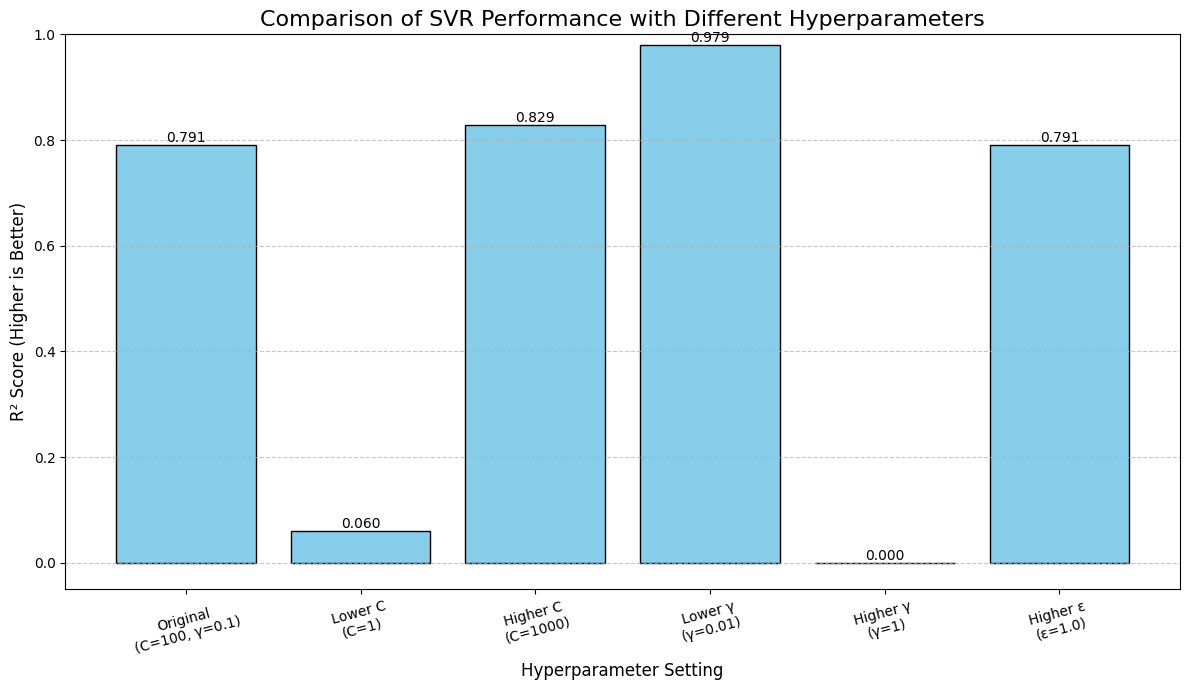

In [3]:
#Task 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Dataset Generation & Splitting (same as before) ---
X, y = make_regression(
    n_samples=2000, n_features=20, n_informative=15, noise=25, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# --- 2. Define SVR Hyperparameter Combinations to Test ---
param_sets = {
    "Original\n(C=100, γ=0.1)": {'C': 100, 'gamma': 0.1, 'epsilon': 0.1},
    "Lower C\n(C=1)": {'C': 1, 'gamma': 0.1, 'epsilon': 0.1},
    "Higher C\n(C=1000)": {'C': 1000, 'gamma': 0.1, 'epsilon': 0.1},
    "Lower γ\n(γ=0.01)": {'C': 100, 'gamma': 0.01, 'epsilon': 0.1},
    "Higher γ\n(γ=1)": {'C': 100, 'gamma': 1, 'epsilon': 0.1},
    "Higher ε\n(ε=1.0)": {'C': 100, 'gamma': 0.1, 'epsilon': 1.0}
}

print("--- Starting SVR Hyperparameter Experiment ---")

# --- 3. Create lists to store results for plotting ---
# I'll save the names and R-squared scores for the final bar chart.
model_names_for_plot = []
r2_scores_for_plot = []

# --- 4. Loop Through, Train, and Evaluate Each Combination ---
for name, params in param_sets.items():

    model = make_pipeline(StandardScaler(), SVR(kernel='rbf', **params))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- {name.replace(chr(10), ' ')} ---") # Replacing newline for clean print
    print(f"Parameters: C={params['C']}, gamma={params['gamma']}, epsilon={params['epsilon']}")
    print(f"MSE: {mse:,.3f}")
    print(f"R²: {r2:.3f}")

    # Add the results to my lists for the plot
    model_names_for_plot.append(name)
    r2_scores_for_plot.append(r2)

# --- 5. Generate the Final Comparison Bar Chart ---
# Now that the loop is done, I'll create the bar chart to see everything together.
plt.figure(figsize=(12, 7))
bars = plt.bar(model_names_for_plot, r2_scores_for_plot, color='skyblue', edgecolor='black')

plt.title('Comparison of SVR Performance with Different Hyperparameters', fontsize=16)
plt.ylabel('R² Score (Higher is Better)', fontsize=12)
plt.xlabel('Hyperparameter Setting', fontsize=12)
plt.ylim(min(r2_scores_for_plot) - 0.05, 1.0) # Set y-axis limits to make it readable
plt.xticks(rotation=15) # Rotate labels slightly for better fit
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the R² value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')

plt.tight_layout()
plt.show()